In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from scipy.stats import linregress
file = ("Data Sources\Master Data Frame.csv")
NFL = pd.read_csv(file)
NFL.head()

,Unnamed: 0,Rank,Winner,Loser,Points Winner,Points Loser,FAVORITE,SPREAD,UNDERDOG,H/A,...,Defensive Rank Loser,4th Quarter Points Surrendered,Spread Winner,Spread Loser,Offensive Rank Spread Winner,Defensive Rank Spread Winner,Offensive Rank Spread Loser,Defensive Rank Spread Loser,4th Quarter Points Surrendered Spread Winner,C/T/NC
0,0,1,Philadelphia Eagles,Atlanta Falcons,18,12,Atlanta Falcons,-1.0,Philadelphia Eagles,A,...,25,7.0,Philadelphia Eagles,Atlanta Falcons,18.0,12.0,10.0,25.0,7.0,Not Covered
1,1,2,Miami Dolphins,Tennessee Titans,27,20,Tennessee Titans,-1.0,Miami Dolphins,A,...,3,9.9,Miami Dolphins,Tennessee Titans,26.0,27.0,27.0,3.0,9.9,Not Covered
2,2,3,Pittsburgh Steelers,Cleveland Browns,21,21,Pittsburgh Steelers,-3.5,Cleveland Browns,A,...,21,7.7,Cleveland Browns,Cleveland Browns,20.0,21.0,20.0,21.0,6.2,Not Covered
3,3,4,New England Patriots,Houston Texans,27,20,New England Patriots,-6.0,Houston Texans,H,...,5,6.4,New England Patriots,Houston Texans,4.0,7.0,11.0,5.0,6.4,Covered
4,4,5,Minnesota Vikings,San Francisco 49ers,24,16,Minnesota Vikings,-6.0,San Francisco 49ers,H,...,28,6.1,Minnesota Vikings,San Francisco 49ers,19.0,9.0,21.0,28.0,6.1,Covered


In [2]:
#Miscellaneous descriptive statistics
MGN = NFL["Margin of Victory"]
OFFRNK = NFL["Offensive Rank Winner"]
DEFRNK = NFL["Defensive Rank Winner"]
OFFRNK_L = NFL["Offensive Rank Loser"]
DEFRNK_L = NFL["Defensive Rank Loser"]
Q = NFL["4th Quarter Points Surrendered"]
SPREAD = NFL["SPREAD"]*-1
FAV_COV = NFL["C/T/NC"]
OFFENSE_SPLIT = OFFRNK -OFFRNK_L

In [3]:
#Dataframe to group covers/non covers
Fav = NFL.groupby(['C/T/NC','SPREAD']).size()
Fav_DF = pd.DataFrame(Fav)
#fav_wins_DF = Fav_DF.loc[Fav_DF['Favorite Covers'] == "Yes"]
#dog_wins_DF = Fav_DF.loc[Fav_DF['Favorite Covers'] == "No"]
Fav_DF.head()


0
C/T/NC  SPREAD   
Covered -14.0   4
        -13.5   2
        -12.5   3
        -12.0   1
        -11.0   1

In [4]:
#additional statistics to add to original dataframe
NFL["Offense Variance"] = OFFENSE_SPLIT*-1
NFL["Count"] = 1
NFL['Margin of Victory'].mean()

10.962546816479401

In [5]:
#group data by covered and not covered in filtered dataframe for bubble plot
fav_wins = NFL.loc[NFL['C/T/NC'] == "Covered"]
dog_wins = NFL.loc[NFL['C/T/NC'] == "Not Covered"]
count_fav = fav_wins['Count'].sum()
count_dog = dog_wins['Count'].sum()
dog_wins['Margin of Victory'].mean()

6.895522388059701

[]

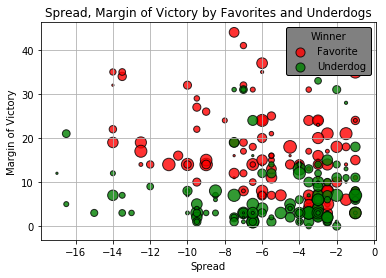

In [6]:
#plot data
plt.scatter(fav_wins['SPREAD'],fav_wins['Margin of Victory'], s=OFFRNK*5,color='red', edgecolors='black', alpha=.8, label="Favorite")
plt.scatter(dog_wins['SPREAD'],dog_wins['Margin of Victory'], s=OFFRNK*5,color='green', edgecolors='black', alpha=.8, label="Underdog")

# Incorporate the other graph properties
plt.grid()
plt.title("Spread, Margin of Victory by Favorites and Underdogs")
plt.ylabel("Margin of Victory")
plt.xlabel("Spread")


# Create a legend
legend = plt.legend(title="Winner")
frame = legend.get_frame() #sets up for color, edge, and transparency
frame.set_facecolor('grey') #color of legend
frame.set_edgecolor('black') #edge color of legend
frame.set_alpha(1) #deals with transparency
plt.savefig("Images/Favorites & Dogs.png")
plt.plot()

In [252]:
#Regression Data
# Set line
(slope, intercept, _, _, _) = linregress(MGN, DEFRNK)
fit = slope * MGN + intercept

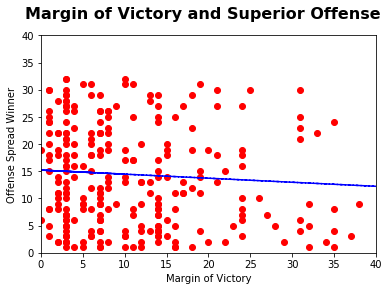

In [258]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Margin of Victory and Superior Offense", fontsize=16, fontweight="bold")

ax.set_xlim(0, 40)
ax.set_ylim(0, 40)

ax.set_xlabel("Margin of Victory")
ax.set_ylabel("Offense Spread Winner")

ax.plot(MGN, OFFRNK, linewidth=0, marker='o', color='red')
ax.plot(MGN, fit, 'b--')
plt.savefig("Images/Regression.png")
plt.show()

In [256]:
X = MGN
y = OFFRNK

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Offensive Rank Winner   R-squared:                       0.343
Model:                               OLS   Adj. R-squared:                  0.340
Method:                    Least Squares   F-statistic:                     138.8
Date:                   Tue, 30 Jul 2019   Prob (F-statistic):           4.64e-26
Time:                           00:24:03   Log-Likelihood:                -1071.5
No. Observations:                    267   AIC:                             2145.
Df Residuals:                        266   BIC:                             2149.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Margin of Victory     0.6748      0.057     11.781      0.000       0.562       0.788
==============================================================================
Omnibus:                        4.415   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.164
Skew:                          -0.115   Prob(JB):                        0.206
Kurtosis:                       2.519   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""